# Paso 1: Cargar el Dataset

In [2]:
!pip install pycaret

     ---------------------------------------- 0.0/486.1 kB ? eta -:--:--
     -------------------- ----------------- 256.0/486.1 kB 7.9 MB/s eta 0:00:01
     -------------------------------- ----- 409.6/486.1 kB 5.1 MB/s eta 0:00:01
     -------------------------------------  481.3/486.1 kB 4.3 MB/s eta 0:00:01
     -------------------------------------- 486.1/486.1 kB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
     ------------------------------------- 258.3/258.3 kB 16.5 MB/s eta 0:00:00
     ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
      --------------------------------------- 0.2/9.8 MB 3.3 MB/s eta 0:00:03
     - -------------------------------------- 0.3/9.8 MB 3.6 MB/s eta 0:00:03
     -- ------------------------------------- 0.5/9.8 MB 3.6 MB/s eta 0:00:03
     -- ------------------------------------- 0.7/9.8 MB 3.8 MB/s eta 0:00:03
     ---- ----------------------------------- 1.1/9.8 MB 4.5 MB/s eta 0

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  DEPRECATION: pyod is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this 

In [1]:
from pycaret.datasets import get_data
dataset = get_data('iris')

ModuleNotFoundError: No module named 'pycaret'

# Paso 2: Configuración del Experimento

In [16]:
from pycaret.classification import setup
exp_clf101 = setup(data             = dataset, 
                   target           = 'species', 
                   session_id       = 123, 
                   train_size       = 0.7, 
                   numeric_features = ["sepal_length", "sepal_width", "petal_length", "petal_width"])

,Description,Value
0,Session id,123
1,Target,species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(150, 5)"
5,Transformed data shape,"(150, 5)"
6,Transformed train set shape,"(105, 5)"
7,Transformed test set shape,"(45, 5)"
8,Numeric features,4
9,Preprocess,True


# Paso 3: Comparación de Modelos

In [17]:
from pycaret.classification import compare_models
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9718,0.0000,0.9718,0.9780,0.9712,0.9573,0.9609,0.9980
knn,K Neighbors Classifier,0.9718,0.0000,0.9718,0.9780,0.9712,0.9573,0.9609,0.5290
qda,Quadratic Discriminant Analysis,0.9718,0.0000,0.9718,0.9780,0.9712,0.9573,0.9609,0.0170
lda,Linear Discriminant Analysis,0.9718,0.0000,0.9718,0.9780,0.9712,0.9573,0.9609,0.0130
lightgbm,Light Gradient Boosting Machine,0.9536,0.0000,0.9536,0.9634,0.9528,0.9298,0.9356,0.1340
nb,Naive Bayes,0.9445,0.0000,0.9445,0.9525,0.9438,0.9161,0.9207,0.0130
et,Extra Trees Classifier,0.9445,0.0000,0.9445,0.9586,0.9426,0.9161,0.9246,0.0520
gbc,Gradient Boosting Classifier,0.9355,0.0000,0.9355,0.9416,0.9325,0.9023,0.9083,0.1050
dt,Decision Tree Classifier,0.9264,0.0000,0.9264,0.9502,0.9201,0.8886,0.9040,0.0110
rf,Random Forest Classifier,0.9264,0.0000,0.9264,0.9343,0.9232,0.8886,0.8956,0.0670


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

# Paso 4: Creación de un Modelo Específico

In [18]:
from pycaret.classification import create_model
dt = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,0.0000,0.9091,0.9273,0.9076,0.8625,0.8735
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9091,0.0000,0.9091,0.9273,0.9076,0.8625,0.8735
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9000,0.0000,0.9000,0.9250,0.8971,0.8485,0.8616
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# Paso 5: Optimización de Hiperparámetros

In [19]:
from pycaret.classification import tune_model
tuned_dt = tune_model(dt, optimize = 'Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,0.0000,0.9091,0.9273,0.9076,0.8625,0.8735
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9091,0.0000,0.9091,0.9273,0.9076,0.8625,0.8735
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9000,0.0000,0.9000,0.9250,0.8971,0.8485,0.8616
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


# Paso 6: Visualización del Modelo

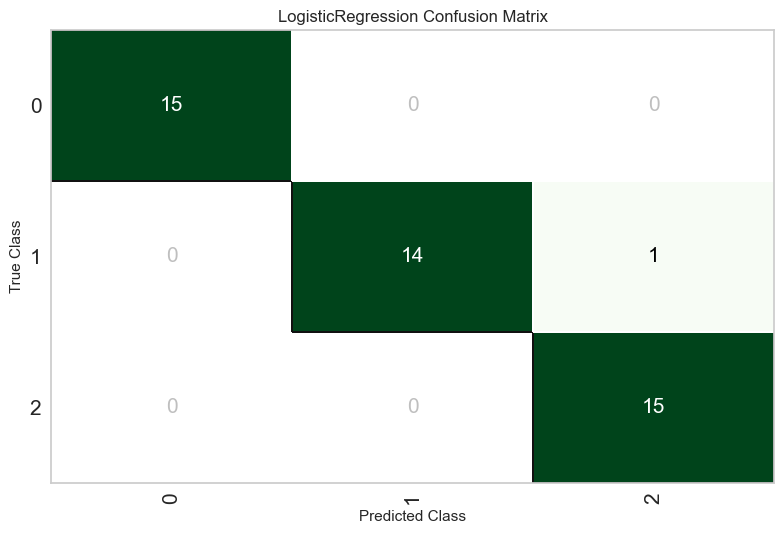

In [20]:
from pycaret.classification import plot_model
plot_model(tuned_dt, plot = 'confusion_matrix')

# Paso 7: Evaluación Exhaustiva del Modelo

In [21]:
from pycaret.classification import evaluate_model
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Paso 8: Finalizar el Modelo

In [22]:
from pycaret.classification import finalize_model
final_dt = finalize_model(tuned_dt)

# Paso 9: Realizar Predicciones

In [23]:
from pycaret.classification import predict_model
predictions = predict_model(final_dt, data=dataset)

# Paso 10: Guardar y Cargar Modelos

In [24]:
from pycaret.classification import save_model
save_model(final_dt, 'final_dt_model_iris')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['sepal_length', 'sepal_width',
                                              'petal_length', 'petal_width'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empt...
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                         

In [25]:
from pycaret.classification import load_model
loaded_model = load_model('final_dt_model_iris')

Transformation Pipeline and Model Successfully Loaded
